In this Oppgave I practice with training a DNN. I choose the DNN mentioned in Oppgave 4, with the aim of classifying MNIST.

I run the algorithms Gradient Descent, NAG, Momentum, BFGS and Backtracking Gradient Descent, with various configurations: Changing learning rates (1, 0.1, 0.01, 0.001), varying the minibatch size (25, 50, 100, 200, 400, 800) and comparing the differences (in training time/epoch, training accuracy, validation/test accuracy).

I apply 200 epochs in each configuration.

In the result graphs, we can see that smaller minibatch sizes lead to longer training times needed. We need a minibatch size of at least 100 to get to validation and test accuracies >0.9. When we further increase the minibatch size, the steepness of the validation and test accuracies increases, meaning that these accuracies are higher within fewer epochs.

In theory, we would expect that smaller learning rates might lead to slower convergence, requiring more iterations to reach convergence and thus increasing the training time. Such behaviour is present e.g. in the graphs for the minibatch size 200 and 800. However, for minibatch size 400, the learning rate 0.001 required less iterations to reach convergence than the learning rate 0.01. 

We can overall deduct that a minimum minibatch size is required to properly train a DNN and that higher learning rates might be beneficial for the training outcome.

Learning Rate: 1, Batch Size: 25
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 5)                 3925      
                                                                 
 dense_11 (Dense)            (None, 10)                60        
                                                                 
Total params: 3985 (15.57 KB)
Trainable params: 3985 (15.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Learning Rate: 1, Batch Size: 50
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0        

 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 5)                 3925      
                                                                 
 dense_29 (Dense)            (None, 10)                60        
                                                                 
Total params: 3985 (15.57 KB)
Trainable params: 3985 (15.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Learning Rate: 0.1, Batch Size: 400
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 5)                 3925      
                                                 

 dense_47 (Dense)            (None, 10)                60        
                                                                 
Total params: 3985 (15.57 KB)
Trainable params: 3985 (15.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Learning Rate: 0.001, Batch Size: 50
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 5)                 3925      
                                                                 
 dense_49 (Dense)            (None, 10)                60        
                                                                 
Total params: 3985 (15.57 KB)
Trainable params: 3985 (15.57 KB)
Non-trainable params: 0 (0.00 Byte)
______________

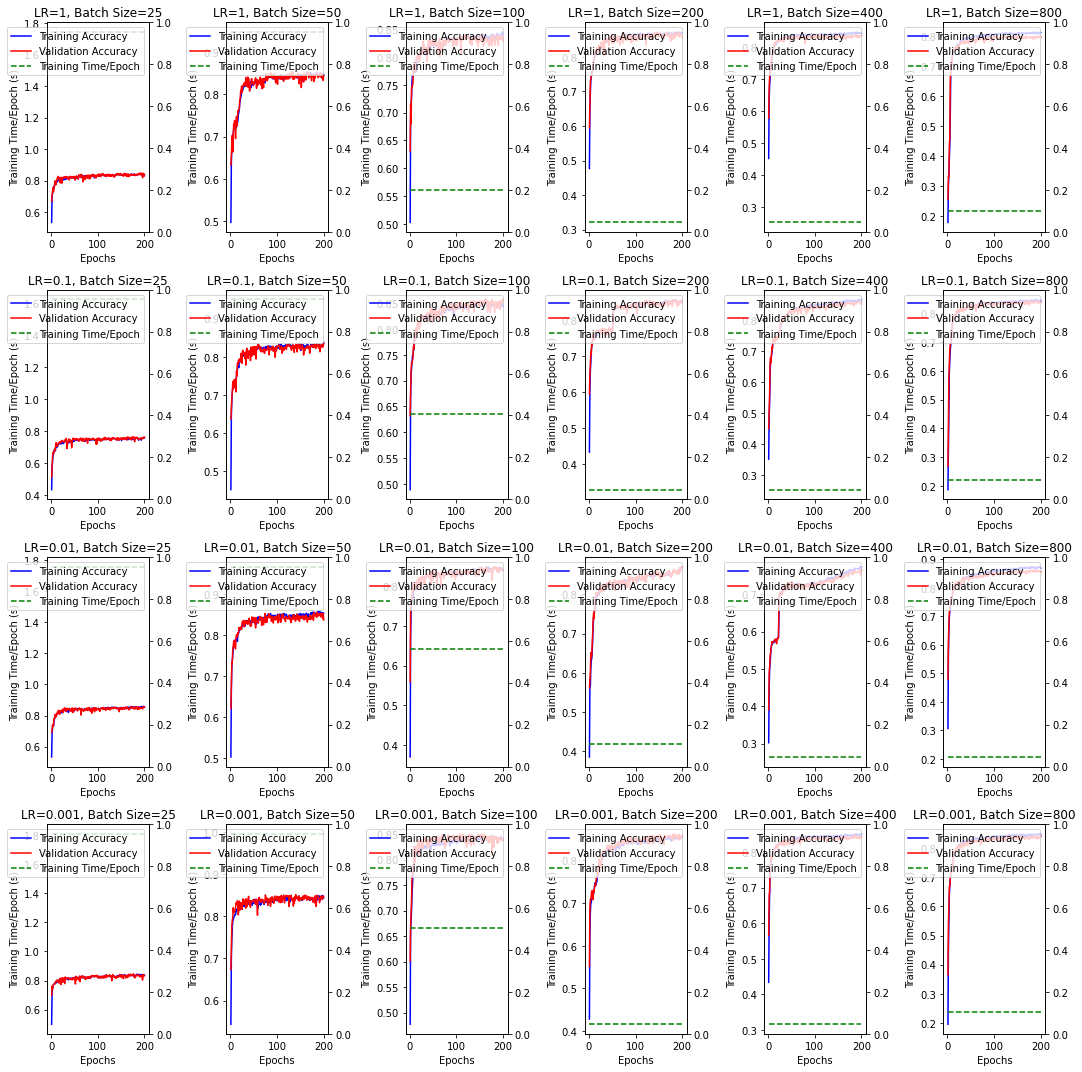

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
import time

# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Convert y_train into one-hot format
y_train = to_categorical(y_train, num_classes=10)

# Convert y_test into one-hot format
y_test = to_categorical(y_test, num_classes=10)

learning_rates = [1, 0.1, 0.01, 0.001]
batch_sizes = [25, 50, 100, 200, 400, 800]

fig, axes = plt.subplots(len(learning_rates), len(batch_sizes), figsize=(15, 15))

for i, lr in enumerate(learning_rates):
    for j, batch_size in enumerate(batch_sizes):
        print(f"Learning Rate: {lr}, Batch Size: {batch_size}")
        model = Sequential()
        model.add(Flatten(input_shape=(28, 28)))
        model.add(Dense(5, activation='sigmoid'))
        model.add(Dense(10, activation='softmax'))

        model.summary()

        model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        start_time = time.time()
        history = model.fit(X_train, y_train, batch_size=batch_size, epochs=200, validation_data=(X_test, y_test), verbose=0)
        end_time = time.time()
        training_time = end_time - start_time

        train_acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        epochs = range(1, len(train_acc) + 1)

        axes[i][j].plot(epochs, train_acc, 'b', label='Training Accuracy')
        axes[i][j].plot(epochs, val_acc, 'r', label='Validation Accuracy')
        axes[i][j].set_title(f"LR={lr}, Batch Size={batch_size}")
        axes[i][j].set_xlabel('Epochs')
        axes[i][j].set_ylabel('Accuracy')
        axes[i][j].legend()

        axes[i][j].twinx()
        axes[i][j].plot(epochs, [training_time / len(train_acc)] * len(train_acc), 'g--', label='Training Time/Epoch')
        axes[i][j].set_ylabel('Training Time/Epoch (s)')
        axes[i][j].legend(loc='upper right')

plt.tight_layout()
plt.show()
